# CA Prop 67 Analysis

By Juli Armstrong 

## Analysis of California Prop 67 from November 2016 election

*A "Yes" vote approves, and a "No" vote rejects, a statute that prohibits grocery and other stores from providing customers single–use plastic or paper carryout bags but permits sale of recycled paper bags and reusable bags. Fiscal Impact: Relatively small fiscal effects on state and local governments, including a minor increase in state administrative costs and possible minor local government savings from reduced litter and waste management costs.*



### Key Findings

- The total large donor amount contributed for Prop 67 was $4,470,574 dollars. There were far more individual contributions in support of the proposition: 6,252 than opposed to it: 27.

- More out of State contributions made up the opposition (26 out of 27 contributions) and more in State contributions made up the supporting money (6,1555 out of 6,252 contributions).

- Six committees were used to support or oppose Prop 67. The majority of money collected by these committees came from the American Progressive Bag Alliance, opposing the proposition with $2,681,413.25. All of the opposition money came from this single committee. The other five committees collected money in support of the proposition.

- The **SUPPORT** side had only 40% of the large donor total amount, but 85% of that came from CA addresses, for a total of $1,789,160.75. 

- The **OPPOSE** side had a larger total large donor contributions, a total of $2,681,413.25, and 0.07% that was contributed by donors with CA addresses.  The majority of the money was from donors with addresses in TX, SC and NJ.


>“It’s a victory that California voters have said ‘no’ to big plastic,” said Mark Murray, executive director of Californians Against Waste. “The defense of this law by grass-roots environmental organizations and community groups is a real testament to this new era of monied special interests not having their way.”

>"The plastic bag industry, largely companies Hilex Poly and Formosa Plastics, paid for Proposition 67 to qualify for the ballot as a referendum to Senate Bill 270. The law banned single-use plastic bags and would have taken effect on Jan. 1, 2015. But the industry’s referendum halted the ban from going into effect until voters weighed in at the polls."

Source: <a href="http://http://www.sacbee.com/news/politics-government/capitol-alert/article113898813.html/">Californians say farewell to the plastic bag</a>  

# The results of the election for Proposition 67

## Yes prevailed 53.27% to 46.73%.


So there was a large correlation between outside money vs. California donor money and the position taken regarding the proposition.  But the "home team" won, in spite of having significantly less large donor money in total.

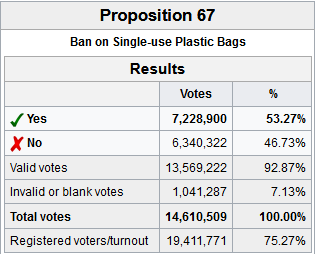

In [4]:
i = Image(filename='Prop67Results.png')
i

Source: <a href="http://https://en.wikipedia.org/wiki/California_Proposition_67_(2016)/">California Proposition 67 (2016)</a>  

# How I Did It

In [9]:
import pandas as pd

In [10]:
import numpy as np

In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt

**Format all float variables with commas to make values more readable**

In [13]:
pd.options.display.float_format = '{:,.2f}'.format

## Reading in the list of propositions

In [14]:
props = pd.read_csv("http://www.firstpythonnotebook.org/_static/committees.csv")

In [15]:
props.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
ocd_prop_id               102 non-null object
calaccess_prop_id         102 non-null int64
ccdc_prop_id              102 non-null int64
prop_name                 102 non-null object
ccdc_committee_id         102 non-null int64
calaccess_committee_id    102 non-null int64
committee_name            102 non-null object
committee_position        102 non-null object
dtypes: int64(4), object(4)
memory usage: 4.8+ KB


## Reading in the list of contributions for the ballot measures.  I inserted a column, Source_St so that I could easily group contributions from California addresses versus out of California addresses.  I handled the missing data in the contributor first and last name columns, and then created a concatenated column, Contributor, that combined the values in those two columns, stripping off any leading or trailing spaces.

In [16]:
contribs = pd.read_csv("http://www.firstpythonnotebook.org/_static/contributions.csv")

In [17]:
contribs.contributor_lastname = contribs.contributor_lastname.fillna('')

In [18]:
contribs.contributor_firstname = contribs.contributor_firstname.fillna('')

In [19]:
contribs['Source_St']= np.where(contribs['contributor_state'] == 'CA', 'CA','OTH')

In [20]:
contribs['Contributor']= contribs['contributor_firstname']+ ' ' + contribs['contributor_lastname']

In [21]:
contribs['Contributor']= contribs['Contributor'].str.strip()

In [22]:
contribs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56379 entries, 0 to 56378
Data columns (total 15 columns):
calaccess_committee_id          56379 non-null int64
committee_name                  56379 non-null object
calaccess_filing_id             56379 non-null int64
date_received                   56379 non-null object
contributor_lastname            56379 non-null object
contributor_firstname           56379 non-null object
contributor_city                56369 non-null object
contributor_state               56363 non-null object
contributor_zip                 56366 non-null object
contributor_employer            48572 non-null object
contributor_occupation          53273 non-null object
contributor_is_self_employed    56379 non-null bool
amount                          56379 non-null float64
Source_St                       56379 non-null object
Contributor                     56379 non-null object
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 3.7+ MB


## Filter the list of propositions for the proposition of interest, Prop 67.

In [23]:
prop_67 = props[props.prop_name == 'PROPOSITION 067- REFERENDUM TO OVERTURN BAN ON SINGLE-USE PLASTIC BAGS.']

In [24]:
prop_67.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 95 to 101
Data columns (total 8 columns):
ocd_prop_id               7 non-null object
calaccess_prop_id         7 non-null int64
ccdc_prop_id              7 non-null int64
prop_name                 7 non-null object
ccdc_committee_id         7 non-null int64
calaccess_committee_id    7 non-null int64
committee_name            7 non-null object
committee_position        7 non-null object
dtypes: int64(4), object(4)
memory usage: 392.0+ bytes


## Merge the propostion and contribution data sets using their common column, calaccess_committee_id.

In [25]:
merged = pd.merge(prop_67, contribs, on='calaccess_committee_id')

In [26]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6279 entries, 0 to 6278
Data columns (total 22 columns):
ocd_prop_id                     6279 non-null object
calaccess_prop_id               6279 non-null int64
ccdc_prop_id                    6279 non-null int64
prop_name                       6279 non-null object
ccdc_committee_id               6279 non-null int64
calaccess_committee_id          6279 non-null int64
committee_name_x                6279 non-null object
committee_position              6279 non-null object
committee_name_y                6279 non-null object
calaccess_filing_id             6279 non-null int64
date_received                   6279 non-null object
contributor_lastname            6279 non-null object
contributor_firstname           6279 non-null object
contributor_city                6279 non-null object
contributor_state               6278 non-null object
contributor_zip                 6278 non-null object
contributor_employer            6092 non-null obje

In [27]:
merged.amount.sum()

4470574.0

In [28]:
merged.committee_position.value_counts()

SUPPORT    6252
OPPOSE       27
Name: committee_position, dtype: int64

### By pivoting the contribution sums by committee position (support/oppose) and by CA versus Out of state contributor address, it is possible to compare the source of money for the different sides.

In [29]:
pd.pivot_table(merged,index=["Source_St"],values=["amount"],
               columns=["committee_position"],aggfunc=[np.sum, len],fill_value=0,margins=True)

sum                              len           \
                         amount                           amount            
committee_position       OPPOSE      SUPPORT          All OPPOSE  SUPPORT   
Source_St                                                                   
CA                     2,000.00 1,528,377.00 1,530,376.75   1.00 6,155.00   
OTH                2,679,413.00   260,784.00 2,940,197.25  26.00    97.00   
All                2,681,413.25 1,789,160.75 4,470,574.00  27.00 6,252.00   

                             
                             
committee_position      All  
Source_St                    
CA                 6,156.00  
OTH                  123.00  
All                6,279.00

### Group the merged data by committee name and committee position and sort in descending total contributions amounts.

In [30]:
merged.groupby(["committee_name_x","committee_position"]).amount.sum().reset_index().sort_values("amount", ascending=False)

,committee_name_x,committee_position,amount
0,"AMERICAN PROGRESSIVE BAG ALLIANCE, A PROJECT O...",OPPOSE,"2,681,413.25"
5,"YES ON 67 - PROTECT THE PLASTIC BAG BAN, SPONS...",SUPPORT,"861,295.75"
2,"SAVE THE BAG BAN, YES ON 67, SPONSORED BY ENVI...",SUPPORT,"609,365.00"
1,CALIFORNIA GROCERS ASSOCIATION ISSUES COMMITTE...,SUPPORT,"200,000.00"
3,SAVE THE BAY ACTION FUND COMMITTEE TO SUPPORT ...,SUPPORT,"97,050.00"
4,YES ON 67 - CALIFORNIANS AGAINST WASTE - PROTE...,SUPPORT,"21,450.00"


### Filtering by committee position of the contributions makes it possible to identify the top ten contributors supporting and opposing the proposition as well as the total contributions by State.

In [31]:
support = merged[merged.committee_position == "SUPPORT"]

In [32]:
support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6252 entries, 0 to 6278
Data columns (total 22 columns):
ocd_prop_id                     6252 non-null object
calaccess_prop_id               6252 non-null int64
ccdc_prop_id                    6252 non-null int64
prop_name                       6252 non-null object
ccdc_committee_id               6252 non-null int64
calaccess_committee_id          6252 non-null int64
committee_name_x                6252 non-null object
committee_position              6252 non-null object
committee_name_y                6252 non-null object
calaccess_filing_id             6252 non-null int64
date_received                   6252 non-null object
contributor_lastname            6252 non-null object
contributor_firstname           6252 non-null object
contributor_city                6252 non-null object
contributor_state               6251 non-null object
contributor_zip                 6251 non-null object
contributor_employer            6092 non-null obje

In [33]:
oppose = merged[merged.committee_position == "OPPOSE"]

In [34]:
oppose.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 128 to 154
Data columns (total 22 columns):
ocd_prop_id                     27 non-null object
calaccess_prop_id               27 non-null int64
ccdc_prop_id                    27 non-null int64
prop_name                       27 non-null object
ccdc_committee_id               27 non-null int64
calaccess_committee_id          27 non-null int64
committee_name_x                27 non-null object
committee_position              27 non-null object
committee_name_y                27 non-null object
calaccess_filing_id             27 non-null int64
date_received                   27 non-null object
contributor_lastname            27 non-null object
contributor_firstname           27 non-null object
contributor_city                27 non-null object
contributor_state               27 non-null object
contributor_zip                 27 non-null object
contributor_employer            0 non-null object
contributor_occupation          0

In [35]:
top_supporters = support.groupby(["contributor_state", "committee_position"]).amount.sum().reset_index().sort_values("amount", ascending=False)

In [60]:
top_supporters

,contributor_state,committee_position,amount
1,CA,SUPPORT,"1,528,376.75"
0,AZ,SUPPORT,"155,040.00"
11,OH,SUPPORT,"80,200.00"
10,NY,SUPPORT,"10,700.00"
3,FL,SUPPORT,"5,000.00"
9,NV,SUPPORT,"2,500.00"
14,TN,SUPPORT,"2,210.00"
16,VA,SUPPORT,"1,150.00"
8,NM,SUPPORT,640.00
2,CO,SUPPORT,436.00


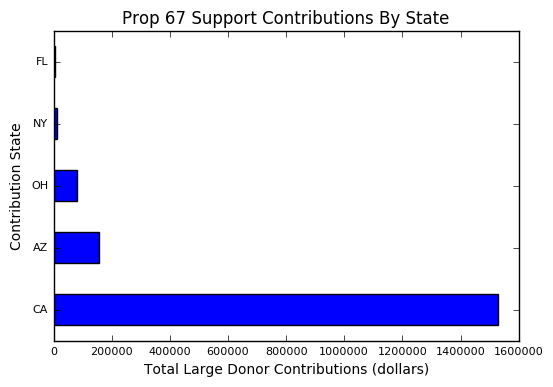

In [36]:
chart =top_supporters.head(5).amount.plot.barh()
chart.set_yticklabels(top_supporters.contributor_state)
chart.set_xlabel('Total Large Donor Contributions (dollars)')
chart.set_ylabel('Contribution State')
chart.set_title('Prop 67 Support Contributions By State')
chart.tick_params(labelsize=8)

In [37]:
top_opposers = oppose.groupby(["contributor_state", "committee_position"]).amount.sum().reset_index().sort_values("amount", ascending=False)

In [61]:
top_opposers

,contributor_state,committee_position,amount
3,TX,OPPOSE,"1,056,202.75"
2,SC,OPPOSE,"874,769.00"
1,NJ,OPPOSE,"748,441.50"
0,CA,OPPOSE,"2,000.00"


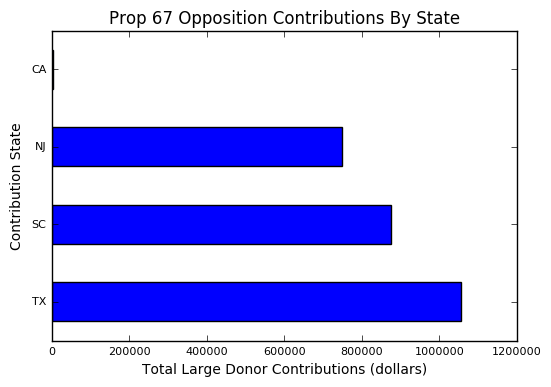

In [38]:
chart =top_opposers.head(5).amount.plot.barh()
chart.set_yticklabels(top_opposers.contributor_state)
chart.set_xlabel('Total Large Donor Contributions (dollars)')
chart.set_ylabel('Contribution State')
chart.set_title('Prop 67 Opposition Contributions By State')
chart.tick_params(labelsize=8)

### Get Top 10 Contributors for Support and Opposition of Proposition 67

In [39]:
support.groupby(["Contributor", "committee_name_x", "committee_position"]).amount.sum().reset_index().sort_values("amount", ascending=False).head(10)

,Contributor,committee_name_x,committee_position,amount
223,CALIFORNIA GROCERS ASSOCIATION,CALIFORNIA GROCERS ASSOCIATION ISSUES COMMITTE...,SUPPORT,"200,000.00"
28,"ALBERTSONS SAFEWAY (FORMERLY KNOWN AS SAFEWAY,...","YES ON 67 - PROTECT THE PLASTIC BAG BAN, SPONS...",SUPPORT,"150,000.00"
1030,JULIE PACKARD,"YES ON 67 - PROTECT THE PLASTIC BAG BAN, SPONS...",SUPPORT,"105,000.00"
337,CLAIRE PERRY,"YES ON 67 - PROTECT THE PLASTIC BAG BAN, SPONS...",SUPPORT,"100,000.00"
224,CALIFORNIA GROCERS ASSOCIATION ISSUES COMMITTE...,"YES ON 67 - PROTECT THE PLASTIC BAG BAN, SPONS...",SUPPORT,"100,000.00"
1622,RALPHS/FOOD 4 LESS,"YES ON 67 - PROTECT THE PLASTIC BAG BAN, SPONS...",SUPPORT,"80,000.00"
1937,THOMAS F STEYER,"YES ON 67 - PROTECT THE PLASTIC BAG BAN, SPONS...",SUPPORT,"50,000.00"
1925,THE NATURE CONSERVANCY,"YES ON 67 - PROTECT THE PLASTIC BAG BAN, SPONS...",SUPPORT,"50,000.00"
1784,SAVE THE BAY (NONPROFIT 501(C)(3)),SAVE THE BAY ACTION FUND COMMITTEE TO SUPPORT ...,SUPPORT,"50,000.00"
1785,SAVE THE BAY ACTION FUND,SAVE THE BAY ACTION FUND COMMITTEE TO SUPPORT ...,SUPPORT,"40,000.00"


In [40]:
oppose.groupby(["Contributor", "committee_name_x", "committee_position"]).amount.sum().reset_index().sort_values("amount", ascending=False).head(10)

,Contributor,committee_name_x,committee_position,amount
2,HILEX POLY CO. LLC,"AMERICAN PROGRESSIVE BAG ALLIANCE, A PROJECT O...",OPPOSE,"874,769.00"
1,FORMOSA PLASTICS CORPORATION U.S.A.,"AMERICAN PROGRESSIVE BAG ALLIANCE, A PROJECT O...",OPPOSE,"748,441.50"
4,SUPERBAG CORP.,"AMERICAN PROGRESSIVE BAG ALLIANCE, A PROJECT O...",OPPOSE,"609,369.75"
0,"ADVANCE POLYBAG, INC.","AMERICAN PROGRESSIVE BAG ALLIANCE, A PROJECT O...",OPPOSE,"446,833.00"
3,RESTORE CALIFORNIA - JIM FRAZIER BALLOT MEASU...,"AMERICAN PROGRESSIVE BAG ALLIANCE, A PROJECT O...",OPPOSE,"2,000.00"


### Aggregate the contribution sums by committee position and CA or Out of State address for contributor for use in analyzing percent of contributions

In [41]:
support_tot = support.amount.sum()

In [42]:
oppose_tot = oppose.amount.sum()

In [43]:
percent_support = support_tot / (support_tot + oppose_tot)

In [44]:
percent_oppose = oppose_tot/(support_tot + oppose_tot)

In [45]:
percent_support

0.40020828421585236

In [46]:
percent_oppose

0.5997917157841476

In [47]:
support_CA = merged[(merged.committee_position == "SUPPORT") & (merged.Source_St =="CA")]

In [48]:
support_OTH = merged[(merged.committee_position == "SUPPORT") & (merged.Source_St =="OTH")]

In [49]:
oppose_CA = merged[(merged.committee_position == "OPPOSE") & (merged.Source_St =="CA")]

In [50]:
oppose_OTH = merged[(merged.committee_position == "OPPOSE") & (merged.Source_St =="OTH")]

In [51]:
support_CA_tot = support_CA.amount.sum()

In [52]:
support_OTH_tot = support_OTH.amount.sum()

In [53]:
oppose_CA_tot = oppose_CA.amount.sum()

In [54]:
oppose_OTH_tot = oppose_OTH.amount.sum()

In [55]:
support_CA.amount.sum()/oppose_CA.amount.sum()

764.188375

### Use the amounts calculated to generate percent CA vs Out of State money for each faction and create a data frame with these values for plotting.

In [56]:
graph_data = {'Type':['All', 'Support', 'Oppose'], 'CA':[(support_CA_tot + oppose_CA_tot)/(support_tot + oppose_tot) * 100,(support_CA_tot/support_tot) *100, (oppose_CA_tot/oppose_tot) *100], 'Out of State':[(oppose_OTH_tot + support_OTH_tot)/(support_tot + oppose_tot) *100, (support_OTH_tot/support_tot)*100, (oppose_OTH_tot/oppose_tot)*100]}

In [57]:
df = pd.DataFrame(graph_data, columns = ['Type', 'CA', 'Out of State'])
df

,Type,CA,Out of State
0,All,34.23,65.77
1,Support,85.42,14.58
2,Oppose,0.07,99.93


### Make  Plot

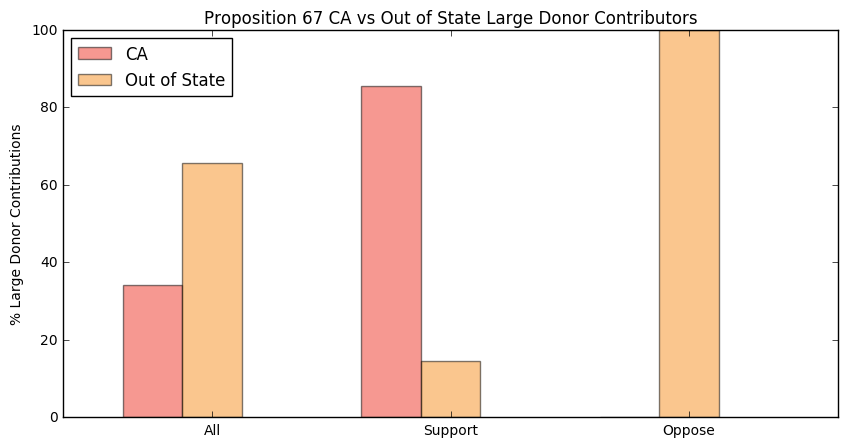

In [62]:
# Setting the positions and width for the bars
pos = list(range(len(df['CA'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with CA,
# in position pos,
plt.bar(pos,
        #using df['CA'] data,
        df['CA'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#EE3224',
        # with label the first value in first_name
        label=df['Type'][0])

# Create a bar with Out of State,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        #using df['Out of State'] data,
        df['Out of State'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F78F1E',
        # with label the second value in first_name
        label=df['Type'][1])



# Set the y axis label
ax.set_ylabel('% Large Donor Contributions')

# Set the chart's title
ax.set_title('Proposition 67 CA vs Out of State Large Donor Contributors')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['Type'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['CA'] + df['Out of State'])] )

# Adding the legend and showing the plot
plt.legend(['CA', 'Out of State'], loc='upper left')
#plt.grid()
plt.show()